Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Read file

In [2]:
path = "/content/drive/MyDrive/Data Analysis/Apartments-Prices-in-Poland/apartments_pl_2024_06.csv"

df = pd.read_csv(path)

In [3]:
df.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,811891f98a870dfd6e414374a0a85560,szczecin,blockOfFlats,47.00,2.0,6.0,12.0,1981.0,53.428544,14.552812,...,0.085,condominium,concreteSlab,NaN,no,yes,yes,no,yes,449000
1,adaf636d0c44d8d9325bce42403eefee,szczecin,apartmentBuilding,88.22,3.0,1.0,2.0,2000.0,53.449093,14.516844,...,0.668,condominium,brick,premium,yes,yes,no,no,no,950000
2,9b957bd60885a469c96f17b58a914f4b,szczecin,apartmentBuilding,117.00,5.0,4.0,4.0,NaN,53.443096,14.561348,...,0.229,udział,brick,premium,yes,yes,no,no,no,1099000
3,74fef2ff7135bc70797a3fbfd7d44ed6,szczecin,blockOfFlats,33.31,1.0,1.0,4.0,1963.0,53.436100,14.541200,...,0.388,cooperative,brick,NaN,yes,no,no,yes,yes,380000
4,77cc78c75b0d09bf84d6d3124a28803c,szczecin,blockOfFlats,56.00,3.0,7.0,7.0,2018.0,53.447465,14.557811,...,0.178,condominium,brick,premium,yes,yes,yes,yes,yes,799000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21501 entries, 0 to 21500
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     21501 non-null  object  
 1   city                   21501 non-null  object  
 2   type                   17104 non-null  object  
 3   squareMeters           21501 non-null  float64 
 4   rooms                  21501 non-null  float64 
 5   floor                  17928 non-null  float64 
 6   floorCount             21292 non-null  float64 
 7   buildYear              18121 non-null  float64 
 8   latitude               21501 non-null  float64 
 9   longitude              21501 non-null  float64 
 10  centreDistance         21501 non-null  float64 
 11  poiCount               21501 non-null  float64 
 12  schoolDistance         21490 non-null  float64 
 13  clinicDistance         21438 non-null  float64 
 14  postOfficeDistance     21481 non-null 

Add price_per_m2 column

In [4]:
df['price_per_m2'] = (df['price'] / df['squareMeters']).round(0)

Display apartments perice per m2 distribution on the map

In [5]:
fig = px.scatter_mapbox(
    df,
    lat=df['latitude'],
    lon=df['longitude'],
    width=600,
    height=600,
    color='price_per_m2',
    hover_data=["price_per_m2"],
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()


Check how many apartments per city are available in the data set

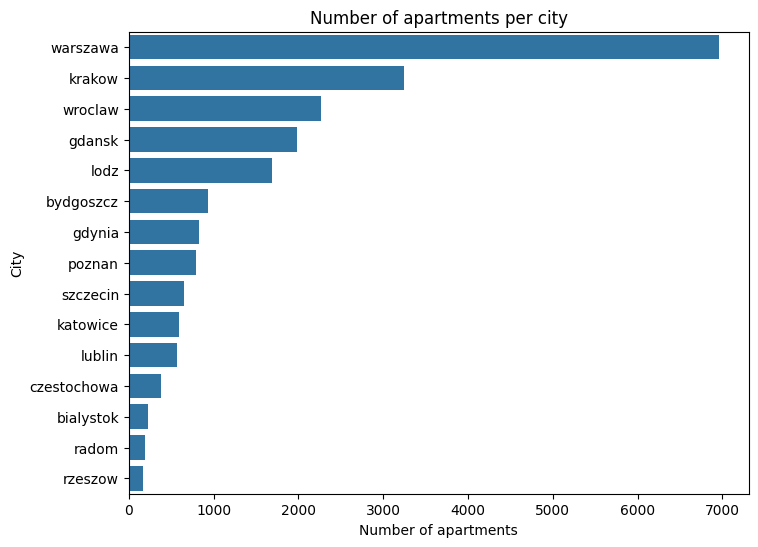

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(df['city'].value_counts(), orient='h')
plt.xlabel('Number of apartments')
plt.ylabel('City')
plt.title('Number of apartments per city');

Plot mean price_per_m2 for each city

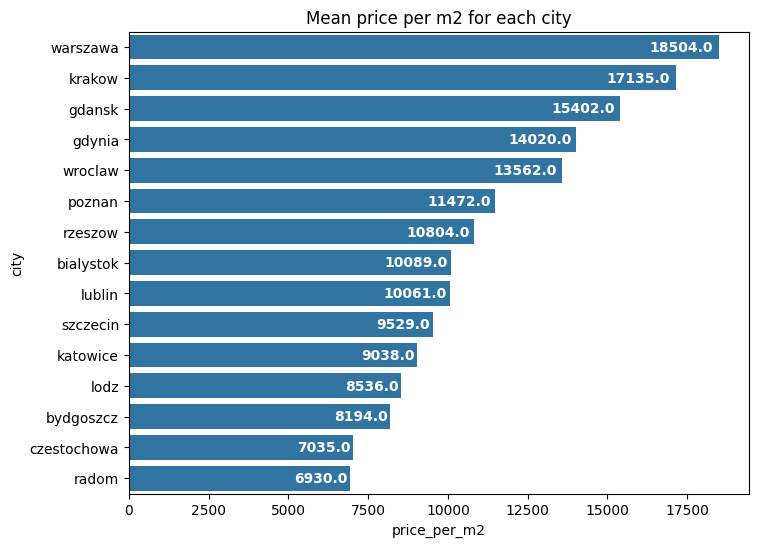

In [ ]:
prices = df.groupby('city')['price_per_m2'].mean().round(0).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(prices, orient='h')
for index, value in enumerate(prices):
    plt.text(value * 0.99, index, value, va='center', ha='right', color='white', fontsize=10, fontweight='bold')
plt.title('Mean price per m2 for each city');

Compare mean price_per_m2 for different city centre distances

In [11]:
df['centreDistance_binned'] = pd.cut(df['centreDistance'], bins=[0, 1, 5, df['centreDistance'].max()], labels=['<1km', '1-5km', '>5km'], include_lowest=True)

In [12]:
price_per_centre_dist = df.groupby(['city', 'centreDistance_binned'], observed=True)['price_per_m2'].mean().round(0).reset_index()

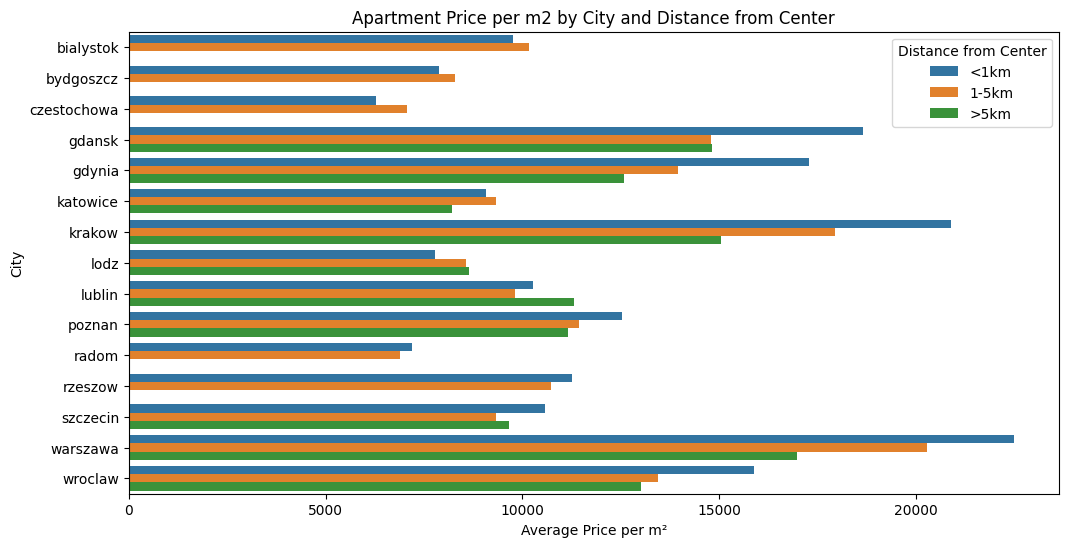

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=price_per_centre_dist, orient='h',
                 x='price_per_m2',
                 y='city',
                 hue='centreDistance_binned')
plt.xlabel("Average Price per m²")
plt.ylabel("City")
plt.title("Apartment Price per m2 by City and Distance from Center")
plt.legend(title="Distance from Center")

Check if building type affects price

In [21]:
price_per_building_type = df.groupby(['city', 'type'])['price_per_m2'].mean().round(0).reset_index()

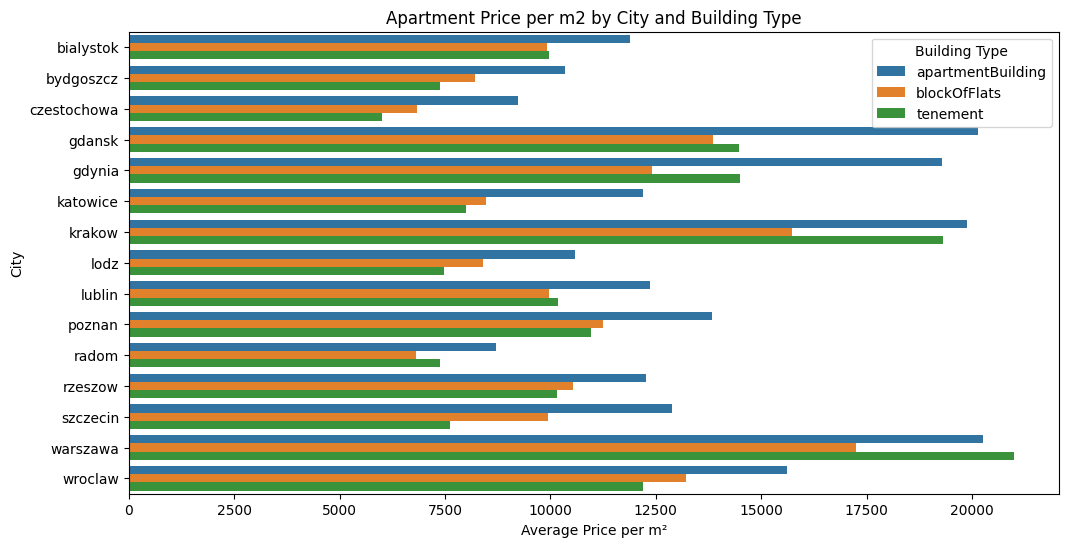

In [24]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=price_per_building_type, orient='h',
                 x='price_per_m2',
                 y='city',
                 hue='type')
plt.xlabel("Average Price per m²")
plt.ylabel("City")
plt.title("Apartment Price per m2 by City and Building Type")
plt.legend(title="Building Type");

Check if building type affects price

In [25]:
price_per_material = df.groupby(['city', 'buildingMaterial'])['price_per_m2'].mean().round(0).reset_index()

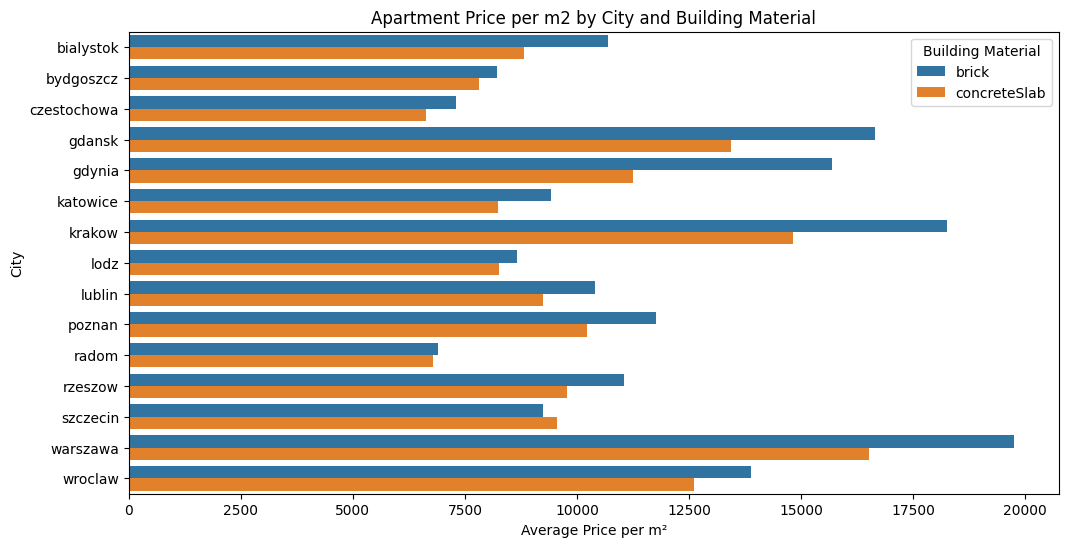

In [28]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=price_per_material, orient='h',
                 x='price_per_m2',
                 y='city',
                 hue='buildingMaterial')
plt.xlabel("Average Price per m²")
plt.ylabel("City")
plt.title("Apartment Price per m2 by City and Building Material")
plt.legend(title="Building Material");

Verify, if slightly rised prices for brick might be connected with building type

In [29]:
df.groupby(['type'])['buildingMaterial'].value_counts()

type               buildingMaterial
apartmentBuilding  brick               3418
                   concreteSlab          16
blockOfFlats       concreteSlab        2769
                   brick               2584
tenement           brick               2957
                   concreteSlab           1
Name: count, dtype: int64

Apartment buildings and tenements are mostly build from brick, which might be the reason why brick is indicating higher apartment prices.